In [4]:
import numpy as np
import pandas as pd

df0 = pd.read_csv('test.csv', names=["name_", "start_time", "end_time", "pbx_id", "proc_def_id_"])



In [288]:
df0

,name_,start_time,end_time,pbx_id,proc_def_id_
0,Create Quote,2014-11-11 16:51:37.729,2014-11-11 16:55:05.995,01499fbd-6b77-82aa-ca3d-000100420005,equipmentPurchase:1:12
1,EQUIP0A - Create Invoice,2014-11-11 16:55:06.004,2014-11-11 19:58:58.88,01499fbd-6b77-82aa-ca3d-000100420005,equipmentPurchase:1:12
2,EQUIP0B - Process Payment,2014-11-11 19:58:58.887,2014-11-11 20:03:10.345,01499fbd-6b77-82aa-ca3d-000100420005,equipmentPurchase:1:12
3,EQUIP2 - Order Phones,2014-11-11 20:03:10.351,2014-11-11 20:52:28.459,01499fbd-6b77-82aa-ca3d-000100420005,equipmentPurchase:1:12
4,DELAYED: EQUIP5 - Receive NetX Update,2014-11-12 20:52:29.093,2014-11-19 21:43:39.316,01499fbd-6b77-82aa-ca3d-000100420005,equipmentPurchase:1:12
5,EQUIP5 - Receive NetX Update,2014-11-11 20:52:28.464,2014-11-13 17:48:34.496,01499fbd-6b77-82aa-ca3d-000100420005,equipmentPurchase:1:12
6,End/Complete - Invoice Customer Shipping Charges,2014-11-13 17:48:34.501,2014-11-14 16:35:33.391,01499fbd-6b77-82aa-ca3d-000100420005,equipmentPurchase:1:12
7,DELAYED: EQUIP5 - Receive NetX Update,2014-11-13 20:52:30.567,2014-11-19 21:43:27.498,01499fbd-6b77-82aa-ca3d-000100420005,equipmentPurchase:1:12
8,NUM0 - New Number Forms,2014-11-11 16:04:25.499,2014-11-11 16:05:46.217,0147893f-1880-bd90-f9d6-000100420002,newNumber:1:8
9,NUM1A - Submit To Carrier,2014-11-11 16:05:46.226,2014-11-11 17:57:10.521,0147893f-1880-bd90-f9d6-000100420002,newNumber:1:8


In [44]:
name_ ="NUM0 - New Number Forms"

In [289]:
def findNums(x):
    tickets = [ "NUM0", "NUM1", "NUM2","NUM3"]
    return x in tickets

def findType(value):
    return "numberCancellation" in value

def isRelevant(name, procedure):
    type_dict = {
        "numberPorting": ["DELAYED: NUM", "NUM5B"],
        "numberCancellation": ["NUM0", "NUM1", "NUM2", "NUM3"],
        "newNumber": ["NUM3C"],
        "equipmentPurchase": ["EQUIP1B", "EQUIP2B", "DELAYED: EQUIP0A"],
        "checkPortInStatus": ["NUM0A"]
    }
    found = False
    for k, values in type_dict.items():
        if k in procedure:
            if name.split("-")[0].strip() in values:
                found = True
                break
        else:
            pass
    return found


In [84]:
isRelevant("numberP","ddd")

False

In [290]:
df2= df0.apply(lambda row: isRelevant(row['name_'], row['proc_def_id_']), axis=1)

In [41]:
"numberCancellation" in c

NameError: name 'c' is not defined

In [293]:
df = df0[df2]

In [297]:
filteredData = df0[df2].copy()

In [300]:
filteredData["name"] = ""

filteredData["name"]=filteredData['name_'].apply(lambda x: x.split("-")[0].strip())

In [305]:
filteredData["proc"]=""
filteredData["proc"]=filteredData['proc_def_id_'].apply(lambda x: x.split(":")[0].strip())

In [306]:
filteredData.drop(['proc_def_id_'], axis=1, inplace=True)

In [307]:
del filteredData['name_']

In [308]:
filteredData

,start_time,end_time,pbx_id,name,proc
86,2014-11-13 00:02:46.704,2014-11-13 00:05:08.412,0143558b-6eb5-b3f0-d05c-000100420002,NUM3C,newNumber
191,2014-11-20 19:53:57.086,2014-11-20 19:54:06.069,0149a4bf-721b-ed7e-ca3d-000100420005,NUM5B,numberPorting
245,2014-12-22 23:08:47.861,2014-12-22 23:08:53.707,01499fd1-d15e-b74b-ca3d-000100420005,NUM5B,numberPorting
248,2014-12-22 23:09:23.424,2014-12-22 23:09:26.35,01499fd1-d15e-b74b-ca3d-000100420005,NUM5B,numberPorting
278,2014-11-14 21:30:51.007,2014-11-14 21:32:41.141,01452389-01b0-fbf9-653a-000100420005,NUM5B,numberPorting
307,2014-11-13 22:43:02.969,2014-11-25 20:27:53.964,0149a5fb-7a4d-6e0f-ca3d-000100420005,DELAYED: EQUIP0A,equipmentPurchase
308,2014-11-14 22:43:00.036,2014-11-25 20:28:17.659,0149a5fb-7a4d-6e0f-ca3d-000100420005,DELAYED: EQUIP0A,equipmentPurchase
309,2014-11-15 22:43:03.64,2014-11-25 20:28:15.355,0149a5fb-7a4d-6e0f-ca3d-000100420005,DELAYED: EQUIP0A,equipmentPurchase
310,2014-11-17 22:42:59.398,2014-11-25 20:28:10.617,0149a5fb-7a4d-6e0f-ca3d-000100420005,DELAYED: EQUIP0A,equipmentPurchase
311,2014-11-18 22:43:02.381,2014-11-25 20:28:07.939,0149a5fb-7a4d-6e0f-ca3d-000100420005,DELAYED: EQUIP0A,equipmentPurchase


In [309]:
filteredData.to_csv("filtrada.csv", index=False)

In [119]:
import types

In [124]:
type(1.1) == str

False

In [310]:
filteredData.dropna(inplace=True)

In [311]:
filteredData['status'] = "0"

In [312]:
filteredData

,start_time,end_time,pbx_id,name,proc,status
86,2014-11-13 00:02:46.704,2014-11-13 00:05:08.412,0143558b-6eb5-b3f0-d05c-000100420002,NUM3C,newNumber,0
191,2014-11-20 19:53:57.086,2014-11-20 19:54:06.069,0149a4bf-721b-ed7e-ca3d-000100420005,NUM5B,numberPorting,0
245,2014-12-22 23:08:47.861,2014-12-22 23:08:53.707,01499fd1-d15e-b74b-ca3d-000100420005,NUM5B,numberPorting,0
248,2014-12-22 23:09:23.424,2014-12-22 23:09:26.35,01499fd1-d15e-b74b-ca3d-000100420005,NUM5B,numberPorting,0
278,2014-11-14 21:30:51.007,2014-11-14 21:32:41.141,01452389-01b0-fbf9-653a-000100420005,NUM5B,numberPorting,0
307,2014-11-13 22:43:02.969,2014-11-25 20:27:53.964,0149a5fb-7a4d-6e0f-ca3d-000100420005,DELAYED: EQUIP0A,equipmentPurchase,0
308,2014-11-14 22:43:00.036,2014-11-25 20:28:17.659,0149a5fb-7a4d-6e0f-ca3d-000100420005,DELAYED: EQUIP0A,equipmentPurchase,0
309,2014-11-15 22:43:03.64,2014-11-25 20:28:15.355,0149a5fb-7a4d-6e0f-ca3d-000100420005,DELAYED: EQUIP0A,equipmentPurchase,0
310,2014-11-17 22:42:59.398,2014-11-25 20:28:10.617,0149a5fb-7a4d-6e0f-ca3d-000100420005,DELAYED: EQUIP0A,equipmentPurchase,0
311,2014-11-18 22:43:02.381,2014-11-25 20:28:07.939,0149a5fb-7a4d-6e0f-ca3d-000100420005,DELAYED: EQUIP0A,equipmentPurchase,0


In [135]:
filteredData = pd.read_csv('filtrada.csv')

In [136]:
filteredData

,name_,start_time,end_time,pbx_id,proc
0,NUM3C - Fix Problems With Number,2014-11-13,2014-11-13,0143558b-6eb5-b3f0-d05c-000100420002,newNumber
1,NUM5B - Resubmit Port Request,2014-11-20,2014-11-20,0149a4bf-721b-ed7e-ca3d-000100420005,numberPorting
2,NUM5B - Resubmit Port Request,2014-12-22,2014-12-22,01499fd1-d15e-b74b-ca3d-000100420005,numberPorting
3,NUM5B - Resubmit Port Request,2014-12-22,2014-12-22,01499fd1-d15e-b74b-ca3d-000100420005,numberPorting
4,NUM5B - Resubmit Port Request,2014-11-14,2014-11-14,01452389-01b0-fbf9-653a-000100420005,numberPorting
5,DELAYED: EQUIP0A - Create Invoice,2014-11-13,2014-11-25,0149a5fb-7a4d-6e0f-ca3d-000100420005,equipmentPurchase
6,DELAYED: EQUIP0A - Create Invoice,2014-11-14,2014-11-25,0149a5fb-7a4d-6e0f-ca3d-000100420005,equipmentPurchase
7,DELAYED: EQUIP0A - Create Invoice,2014-11-15,2014-11-25,0149a5fb-7a4d-6e0f-ca3d-000100420005,equipmentPurchase
8,DELAYED: EQUIP0A - Create Invoice,2014-11-17,2014-11-25,0149a5fb-7a4d-6e0f-ca3d-000100420005,equipmentPurchase
9,DELAYED: EQUIP0A - Create Invoice,2014-11-18,2014-11-25,0149a5fb-7a4d-6e0f-ca3d-000100420005,equipmentPurchase


In [137]:
filteredData.columns

Index(['name_', 'start_time', 'end_time', 'pbx_id', 'proc'], dtype='object')

In [313]:
filteredData['status'] = filteredData['name'].apply(lambda x: "0" if x == "NUM3" else "1")

In [314]:
filteredData.to_csv("filtrada.csv", index=False)

In [112]:
df0 = pd.read_csv('filtrada.csv')

In [562]:
df[df['proc'] =='DELAYED: NUM']

,start_time,end_time,pbx_id,name,proc,status


In [343]:
df['procNum'] = '0'

In [344]:
df['specProcNum'] = '0'

In [345]:
def numProcRelevant(procedure):
    type_dict = {
        "numberPorting": "100",
        "numberCancellation": "200",
        "newNumber": "300",
        "equipmentPurchase": "400",
        "checkPortInStatus": "500"
    }
    return type_dict[procedure]

In [346]:
numProcRelevant("numberCancellation")

'200'

In [347]:
df['procNum'] = df['proc'].apply(lambda x: numProcRelevant(x))

In [348]:
def specificProcNum(name, procedure):
    type_dict = {
        "numberPorting": {"DELAYED: NUM": "101", "NUM5B": "102"},
        "numberCancellation": {"NUM0":"201", "NUM1":"202", "NUM2":"203", "NUM3":"204"},
        "newNumber": {"NUM3C":"301"},
        "equipmentPurchase": {"EQUIP1B":"401", "EQUIP2B":"402", "DELAYED: EQUIP0A":"403"},
        "checkPortInStatus": {"NUM0A":"501"}
    }
    
    return type_dict[procedure][name]

In [349]:
specificProcNum("NUM3","numberCancellation")

'204'

In [350]:
df['specProcNum'] = df.apply(lambda row: specificProcNum(row['name'], row['proc']), axis=1)

In [351]:
del df['name']

In [352]:
del df['proc']

In [353]:
df['proc_101'] = df['proc_102'] = "0"

In [354]:
df['proc_201'] = df['proc_202'] = df['proc_203'] = df["proc_204"] = "0"

In [355]:
df['proc_301'] = '0'

In [356]:
df['proc_401'] = df['proc_402'] = df['proc_403'] = 0

In [357]:
df['proc_501'] = '0'

In [360]:
def setData(row):
    columnPart = row['specProcNum']
    print("proc_%s" %(columnPart))
    row["proc_%s" %(columnPart)] = "1"

In [361]:
df.loc[0, 'specProcNum']


'301'

In [362]:
df.loc[0,"proc_%s" % (df.loc[0,'specProcNum'])]=1

In [363]:
df.index


RangeIndex(start=0, stop=75060, step=1)

In [364]:
def applyNewColumns():
    for i in df.index:
        df.loc[i,"proc_%s" % (df.loc[i,'specProcNum'])]=1
    

In [365]:
applyNewColumns()

In [369]:
del df['procNum']

In [370]:
del df['specProcNum']

In [366]:
df.to_csv('filt_new_columns.csv')


In [556]:
dfTemp[dfTemp['specProcNum'] == 101]

,Unnamed: 0,start_time,end_time,pbx_id,status,procNum,specProcNum,proc_101,proc_102,proc_201,proc_202,proc_203,proc_204,proc_301,proc_401,proc_402,proc_403,proc_501


In [553]:
dfTemp = pd.read_csv('filt_new_columns.csv')

In [376]:
df.sort_values(["pbx_id","start_time"], inplace=True)

In [378]:
import datetime

In [379]:
datetime.datetime.strptime('24052010', "%d%m%Y").date()

datetime.date(2010, 5, 24)

In [407]:
a = datetime.datetime.strptime('2016-10-14 22:45:27.918', '%Y-%m-%d %H:%M:%S.%f')

In [408]:
b = datetime.datetime.strptime("2016-10-13 19:50:48.313", '%Y-%m-%d %H:%M:%S.%f')

datetime.timedelta(-1, 86378, 565000)

In [409]:
c = a-b

In [414]:
c.total_seconds()/3600

26.911001388888888

In [417]:
def timeColumns():
    for i in range(7):
        df['Day_%s' % (i)] = 0
    for i in range(12):
        df["Month_%s" % (i)] = 0
    df["time_delta"] = ""

In [418]:
timeColumns()

In [419]:
df

,start_time,end_time,pbx_id,status,proc_101,proc_102,proc_201,proc_202,proc_203,proc_204,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,time_delta
58031,2017-07-06 14:43:15.014,2017-07-06 14:43:36.449,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,
58030,2017-07-06 14:43:36.45,2017-07-07 19:21:54.377,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,
58033,2017-07-07 19:21:54.381,2017-07-07 19:22:35.393,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,
58032,2017-07-07 19:22:35.395,2017-07-07 19:22:43.363,007d71d9-060d-451c-bfb2-92577a9c5fb9,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,
42646,2016-05-10 18:33:14.263,2016-05-10 18:33:18.827,01279d6f-103f-6c0a-bd22-000100420001,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,
42647,2016-05-18 15:03:43.193,2016-05-18 20:31:53.079,01279d6f-103f-6c0a-bd22-000100420001,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,
55509,2016-10-12 22:28:41.705,2016-10-12 22:29:26.568,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,
55510,2016-10-12 22:29:26.57,2016-10-13 19:50:48.312,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,
55511,2016-10-13 19:50:48.313,2016-10-14 22:45:27.918,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,
55512,2016-10-14 22:45:27.919,2016-10-14 22:45:32.545,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,


In [415]:
def fillTimeColumns():
    for i in df.index:
        stCell = df.loc[i, 'start_time']
        enCell = df.loc[i, "end_time"]
        try:
            st = datetime.datetime.strptime(stCell, '%Y-%m-%d %H:%M:%S.%f')
        except ValueError:
            st = datetime.datetime.strptime(stCell, '%Y-%m-%d %H:%M:%S')
            
        try:
            en = datetime.datetime.strptime(enCell, '%Y-%m-%d %H:%M:%S.%f')
        except ValueError:
            en = datetime.datetime.strptime(enCell, '%Y-%m-%d %H:%M:%S')
            
        deltaTime =((en - st).total_seconds()/3600)
        dayNum = st.weekday()
        monthNum = st.month - 1
        df.loc[i,"Day_%s" % (dayNum)]=1
        df.loc[i,"Month_%s" % (monthNum)] = 1
        df.loc[i, "time_delta"] = deltaTime
        

In [420]:
fillTimeColumns()

In [421]:
df

,start_time,end_time,pbx_id,status,proc_101,proc_102,proc_201,proc_202,proc_203,proc_204,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,time_delta
58031,2017-07-06 14:43:15.014,2017-07-06 14:43:36.449,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0.00595417
58030,2017-07-06 14:43:36.45,2017-07-07 19:21:54.377,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,28.6383
58033,2017-07-07 19:21:54.381,2017-07-07 19:22:35.393,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.0113922
58032,2017-07-07 19:22:35.395,2017-07-07 19:22:43.363,007d71d9-060d-451c-bfb2-92577a9c5fb9,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0.00221333
42646,2016-05-10 18:33:14.263,2016-05-10 18:33:18.827,01279d6f-103f-6c0a-bd22-000100420001,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.00126778
42647,2016-05-18 15:03:43.193,2016-05-18 20:31:53.079,01279d6f-103f-6c0a-bd22-000100420001,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5.46941
55509,2016-10-12 22:28:41.705,2016-10-12 22:29:26.568,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.0124619
55510,2016-10-12 22:29:26.57,2016-10-13 19:50:48.312,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,21.356
55511,2016-10-13 19:50:48.313,2016-10-14 22:45:27.918,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,26.911
55512,2016-10-14 22:45:27.919,2016-10-14 22:45:32.545,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.001285


In [422]:
df.to_csv("preprocessed.csv")

In [567]:
df = pd.read_csv('preprocessed.csv')

In [568]:
del df['end_time']

In [569]:
del df['start_time']

In [570]:
def populateDict():
    pbxIdDict = {}
    start = 1
    df['int_id'] = 0
    for i in df.index:
        pbxId = df.loc[i, 'pbx_id']
        if pbxId not in pbxIdDict:
            pbxIdDict[pbxId] = start/100000
            start +=1
        df.loc[i, 'int_id'] = pbxIdDict[pbxId]
        

In [571]:
populateDict()

In [572]:
dfGone = pd.read_excel('OtherData.xlsx',sheetname="Sheet1")

In [573]:
dfHappy= pd.read_excel('OtherData.xlsx',sheetname="Sheet2")

In [574]:
del df['Unnamed: 0']

In [575]:
dfConcat = pd.concat([dfGone, dfHappy],ignore_index=True)

In [577]:
df

,pbx_id,status,proc_101,proc_102,proc_201,proc_202,proc_203,proc_204,proc_301,proc_401,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,time_delta,int_id
0,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.005954,0.00001
1,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,28.638313,0.00001
2,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0.011392,0.00001
3,007d71d9-060d-451c-bfb2-92577a9c5fb9,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0.002213,0.00001
4,01279d6f-103f-6c0a-bd22-000100420001,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.001268,0.00002
5,01279d6f-103f-6c0a-bd22-000100420001,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,5.469413,0.00002
6,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.012462,0.00002
7,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,21.356039,0.00002
8,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,26.911001,0.00002
9,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.001285,0.00002


In [578]:
otherdf = dfConcat.copy()

In [579]:
otherdf = dfConcat.copy()

In [580]:
otherdf = otherdf[otherdf["pbx_id"].notnull()]

In [581]:
otherdf

,pbx_id,Seats,MRR,days,Tickets,csat
0,014fbcae-7e25-2ecd-18a5-000100420002,2.0,59.90,311.0,1.0,2.0
1,0153aa53-65f2-2dc6-281d-000100420007,3.0,77.85,285.0,NaN,5.0
2,013d64b1-3d88-3115-a45f-000100420005,1.0,59.90,1393.0,8.0,7.0
3,01491651-7aa3-d78b-1c94-000100420005,27.0,921.90,825.0,9.0,8.0
4,014d0bce-1f7e-4d9c-8a54-000100420002,3.0,89.85,614.0,1.0,7.0
5,0137b9f7-d372-0bd7-0f4e-000100420002,1.0,29.95,1674.0,5.0,NaN
6,01571fd8-9b5b-99fd-cddc-000100420007,40.0,878.00,114.0,4.0,3.0
7,014b9e96-2ea4-08dc-f34c-000100420002,5.0,149.75,686.0,6.0,NaN
8,014b74b7-8185-9a86-f26a-000100420002,21.0,526.90,694.0,9.0,9.0
9,01571f23-106e-2c39-cddc-000100420007,1.0,29.95,114.0,8.0,NaN


In [582]:
otherdf.to_csv('filteredNPS.csv', index=False)

In [583]:
dfFinal = pd.merge(df,otherdf,how='left',on='pbx_id')

In [584]:
dfFinal.to_csv('mergedData.csv', index=True)

In [84]:
dfFinal = pd.read_csv('mergedData.csv')

In [85]:
del dfFinal['Unnamed: 0']

In [48]:
dfFinal['csat'].fillna(value=dfFinal['csat'].mean())

0         6.616682
1         6.616682
2         6.616682
3         6.616682
4         6.616682
5         6.616682
6         6.616682
7         6.616682
8         6.616682
9         6.616682
10        6.616682
11        6.616682
12        6.616682
13        6.616682
14        6.616682
15        6.616682
16        6.616682
17        6.616682
18        6.616682
19        6.616682
20        6.616682
21        6.616682
22        6.616682
23        6.616682
24        6.616682
25        6.616682
26        6.616682
27        6.616682
28        6.616682
29        6.616682
           ...    
75252     6.616682
75253     6.616682
75254     6.616682
75255     6.616682
75256     6.616682
75257     6.616682
75258     6.616682
75259     6.616682
75260     6.616682
75261     6.616682
75262     6.616682
75263     6.616682
75264     6.616682
75265     6.616682
75266     6.616682
75267     6.616682
75268     6.616682
75269     6.616682
75270     6.616682
75271     6.616682
75272     6.616682
75273     6.

In [86]:
dfFinal.describe()

,status,proc_101,proc_102,proc_201,proc_202,proc_203,proc_204,proc_301,proc_401,proc_402,...,Month_9,Month_10,Month_11,time_delta,int_id,Seats,MRR,days,Tickets,csat
count,75282.000000,75282.0,75282.00000,75282.000000,75282.000000,75282.000000,75282.000000,75282.000000,75282.000000,75282.000000,...,75282.000000,75282.000000,75282.000000,75282.000000,75282.000000,7519.000000,7519.000000,7529.000000,6381.000000,2194.000000
mean,0.822919,0.0,0.08237,0.184493,0.182965,0.177506,0.177081,0.001514,0.003440,0.003454,...,0.050424,0.051712,0.056494,61.481749,0.048378,23.653677,447.909883,749.389826,5.240871,6.616682
std,0.381740,0.0,0.27493,0.387888,0.386641,0.382099,0.381740,0.038885,0.058554,0.058667,...,0.218819,0.221447,0.230875,488.896625,0.029727,83.674568,1421.140302,604.241497,3.545689,3.532575
min,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000423,0.000010,0.000000,0.000000,-3.000000,1.000000,0.000000
25%,1.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003172,0.027620,2.000000,30.000000,288.000000,3.000000,4.000000
50%,1.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.030515,0.039440,4.000000,103.800000,659.000000,5.000000,7.000000
75%,1.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.855174,0.072200,10.000000,239.500000,1055.000000,8.000000,10.000000
max,1.000000,0.0,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,20319.228677,0.111610,1352.000000,24293.700000,3359.000000,45.000000,10.000000


In [89]:
def replaceNullCsat():
    mean = dfFinal['csat'].mean()
    for i in dfFinal.index:
        if np.isnan(dfFinal.loc[i,'csat']):
            if dfFinal.loc[i,'status'] == 0:
                dfFinal.loc[i,'csat'] = 5
            else:
                dfFinal.loc[i,'csat'] = 9

In [90]:
replaceNullCsat()

In [91]:
def replaceNullTickets():
    vMax = dfFinal['Tickets'].max()
    for i in dfFinal.index:
        if np.isnan(dfFinal.loc[i,'Tickets']):
            if dfFinal.loc[i,'status'] == 0:
                dfFinal.loc[i,'Tickets'] = vMax
            else:
                dfFinal.loc[i,'Tickets'] = 2.5

In [92]:
replaceNullTickets()

In [93]:
def replaceNullDays():
    mean = dfFinal['days'].mean()
    for i in dfFinal.index:
        if np.isnan(dfFinal.loc[i,'days']):
            dfFinal.loc[i,'days'] = mean

In [94]:
replaceNullDays()

In [95]:
def replaceNullMRR():
    mean = dfFinal['MRR'].mean()
    for i in dfFinal.index:
        if np.isnan(dfFinal.loc[i,'MRR']):
            dfFinal.loc[i,'MRR'] = mean

In [96]:
replaceNullMRR()

In [97]:
def replaceNullSeats():
    mean = dfFinal['Seats'].mean()
    for i in dfFinal.index:
        if np.isnan(dfFinal.loc[i,'Seats']):
            dfFinal.loc[i,'Seats'] = mean

In [98]:
replaceNullSeats()

In [99]:
dfFinal.to_csv('data_1030_pbx.csv', index=False)

In [100]:
dfFinal

,pbx_id,status,proc_101,proc_102,proc_201,proc_202,proc_203,proc_204,proc_301,proc_401,...,Month_9,Month_10,Month_11,time_delta,int_id,Seats,MRR,days,Tickets,csat
0,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,1,0,0,0,0,0,...,0,0,0,0.005954,0.00001,23.653677,447.909883,749.389826,2.5,9.0
1,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,0,1,0,0,0,0,...,0,0,0,28.638313,0.00001,23.653677,447.909883,749.389826,2.5,9.0
2,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,0,0,1,0,0,0,...,0,0,0,0.011392,0.00001,23.653677,447.909883,749.389826,2.5,9.0
3,007d71d9-060d-451c-bfb2-92577a9c5fb9,0,0,0,0,0,0,1,0,0,...,0,0,0,0.002213,0.00001,23.653677,447.909883,749.389826,45.0,5.0
4,01279d6f-103f-6c0a-bd22-000100420001,1,0,1,0,0,0,0,0,0,...,0,0,0,0.001268,0.00002,23.653677,447.909883,749.389826,2.5,9.0
5,01279d6f-103f-6c0a-bd22-000100420001,1,0,1,0,0,0,0,0,0,...,0,0,0,5.469413,0.00002,23.653677,447.909883,749.389826,2.5,9.0
6,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,1,0,0,0,0,0,...,1,0,0,0.012462,0.00002,23.653677,447.909883,749.389826,2.5,9.0
7,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,0,1,0,0,0,0,...,1,0,0,21.356039,0.00002,23.653677,447.909883,749.389826,2.5,9.0
8,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,1,0,0,0,0,0,...,1,0,0,26.911001,0.00002,23.653677,447.909883,749.389826,2.5,9.0
9,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,0,1,0,0,0,0,...,1,0,0,0.001285,0.00002,23.653677,447.909883,749.389826,2.5,9.0


In [26]:
import seaborn as sns

In [544]:
sns.heatmap(dfFinal.corr(), annot=True, linewidths=.5, ax=ax)

In [27]:
%matplotlib inline

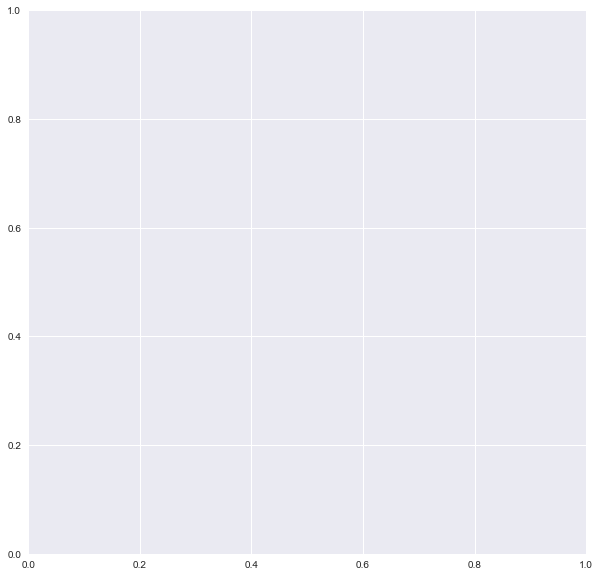

In [542]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))   


In [28]:
dfFinal[dfFinal['proc_101'] > 0]

,pbx_id,status,proc_101,proc_102,proc_201,proc_202,proc_203,proc_204,proc_301,proc_401,...,Month_9,Month_10,Month_11,time_delta,int_id,Seats,MRR,days,Tickets,csat


In [29]:
del dfFinal['proc_101']

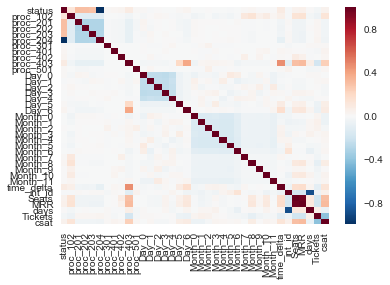

In [558]:
sns.heatmap(dfFinal.corr())

In [601]:
dfFinal

,pbx_id,status,proc_101,proc_102,proc_201,proc_202,proc_203,proc_204,proc_301,proc_401,...,Month_9,Month_10,Month_11,time_delta,int_id,Seats,MRR,days,Tickets,csat
0,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,1,0,0,0,0,0,...,0,0,0,0.005954,0.00001,23.653677,447.909883,749.389826,5.240871,6.616682
1,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,0,1,0,0,0,0,...,0,0,0,28.638313,0.00001,23.653677,447.909883,749.389826,5.240871,6.616682
2,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,0,0,1,0,0,0,...,0,0,0,0.011392,0.00001,23.653677,447.909883,749.389826,5.240871,6.616682
3,007d71d9-060d-451c-bfb2-92577a9c5fb9,0,0,0,0,0,0,1,0,0,...,0,0,0,0.002213,0.00001,23.653677,447.909883,749.389826,5.240871,6.616682
4,01279d6f-103f-6c0a-bd22-000100420001,1,0,1,0,0,0,0,0,0,...,0,0,0,0.001268,0.00002,23.653677,447.909883,749.389826,5.240871,6.616682
5,01279d6f-103f-6c0a-bd22-000100420001,1,0,1,0,0,0,0,0,0,...,0,0,0,5.469413,0.00002,23.653677,447.909883,749.389826,5.240871,6.616682
6,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,1,0,0,0,0,0,...,1,0,0,0.012462,0.00002,23.653677,447.909883,749.389826,5.240871,6.616682
7,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,0,1,0,0,0,0,...,1,0,0,21.356039,0.00002,23.653677,447.909883,749.389826,5.240871,6.616682
8,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,1,0,0,0,0,0,...,1,0,0,26.911001,0.00002,23.653677,447.909883,749.389826,5.240871,6.616682
9,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,0,1,0,0,0,0,...,1,0,0,0.001285,0.00002,23.653677,447.909883,749.389826,5.240871,6.616682


In [101]:
dfFinal.sort_values(["pbx_id"], inplace=True)

In [102]:
del dfFinal['pbx_id']

In [103]:
del dfFinal['proc_101']

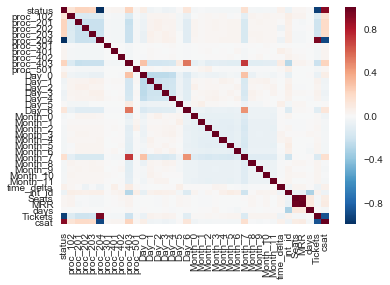

In [104]:
sns.heatmap(dfFinal.corr())

In [105]:
dfFinal.to_csv('data_1033.csv', index=False)

In [106]:
dfFinal2 = dfFinal.drop('int_id',1)

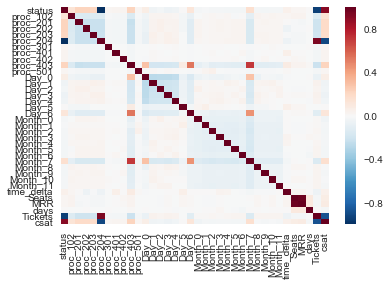

In [107]:
sns.heatmap(dfFinal2.corr())

In [110]:
dfFinal2.to_csv('final_csv_noid3.csv', index=True)

In [127]:
dfFinal["int_id"].value_counts()

0.03523    6157
0.02762    5400
0.01010     217
0.01799     174
0.03135     168
0.03737     165
0.03670     163
0.00532     156
0.03436     151
0.00812     151
0.00813     149
0.03081     149
0.03622     146
0.07219      87
0.00707      81
0.07861      72
0.02657      72
0.01318      66
0.02888      57
0.01224      57
0.03844      54
0.04762      54
0.04751      54
0.06487      51
0.05226      49
0.01830      48
0.00991      46
0.03506      46
0.03029      46
0.02659      44
           ... 
0.10923       1
0.06592       1
0.08655       1
0.04252       1
0.04222       1
0.04770       1
0.08374       1
0.09176       1
0.06315       1
0.05971       1
0.05440       1
0.07166       1
0.06416       1
0.07333       1
0.06576       1
0.06203       1
0.01251       1
0.05766       1
0.02874       1
0.05444       1
0.08698       1
0.03430       1
0.05465       1
0.08811       1
0.03223       1
0.04509       1
0.03959       1
0.04783       1
0.05027       1
0.04642       1
Name: int_id, Length: 11

In [117]:
df0.groupby(['proc','name']).count()

start_time  end_time  pbx_id  status
proc               name                                                  
checkPortInStatus  NUM0A                    139       139     139     139
equipmentPurchase  DELAYED: EQUIP0A       13952     13952   13952   13952
                   EQUIP1B                  259       259     259     259
                   EQUIP2B                  259       259     259     259
newNumber          NUM3C                    114       114     114     114
numberCancellation NUM0                   13842     13842   13842   13842
                   NUM1                   13727     13727   13727   13727
                   NUM2                   13318     13318   13318   13318
                   NUM3                   13291     13291   13291   13291
numberPorting      NUM5B                   6159      6159    6159    6159

In [129]:
dfFinal2['csat'].min()

0.0

In [133]:
dfFinal[dfFinal['csat']<5]

,status,proc_102,proc_201,proc_202,proc_203,proc_204,proc_301,proc_401,proc_402,proc_403,...,Month_9,Month_10,Month_11,time_delta,int_id,Seats,MRR,days,Tickets,csat
107,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0.010181,0.00016,1.0,30.00,2496.0,8.0,2.0
108,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0.540623,0.00016,1.0,30.00,2496.0,8.0,2.0
109,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.000736,0.00016,1.0,30.00,2496.0,8.0,2.0
110,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0.000711,0.00016,1.0,30.00,2496.0,8.0,2.0
577,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0.005066,0.00093,1.0,30.00,2708.0,5.0,4.0
578,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0.000835,0.00093,1.0,30.00,2708.0,5.0,4.0
579,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.008613,0.00093,1.0,30.00,2708.0,5.0,4.0
580,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0.021762,0.00093,1.0,30.00,2708.0,5.0,4.0
581,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0.017796,0.00093,1.0,30.00,2708.0,5.0,4.0
582,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2.663181,0.00093,1.0,30.00,2708.0,5.0,4.0


In [134]:
df00 = pd.read_csv('data_1030_pbx.csv')

In [135]:
df00['csat']<0

,pbx_id,status,proc_101,proc_102,proc_201,proc_202,proc_203,proc_204,proc_301,proc_401,...,Month_9,Month_10,Month_11,time_delta,int_id,Seats,MRR,days,Tickets,csat
0,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,1,0,0,0,0,0,...,0,0,0,0.005954,0.00001,23.653677,447.909883,749.389826,2.5,9.0
1,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,0,1,0,0,0,0,...,0,0,0,28.638313,0.00001,23.653677,447.909883,749.389826,2.5,9.0
2,007d71d9-060d-451c-bfb2-92577a9c5fb9,1,0,0,0,0,1,0,0,0,...,0,0,0,0.011392,0.00001,23.653677,447.909883,749.389826,2.5,9.0
3,007d71d9-060d-451c-bfb2-92577a9c5fb9,0,0,0,0,0,0,1,0,0,...,0,0,0,0.002213,0.00001,23.653677,447.909883,749.389826,45.0,5.0
4,01279d6f-103f-6c0a-bd22-000100420001,1,0,1,0,0,0,0,0,0,...,0,0,0,0.001268,0.00002,23.653677,447.909883,749.389826,2.5,9.0
5,01279d6f-103f-6c0a-bd22-000100420001,1,0,1,0,0,0,0,0,0,...,0,0,0,5.469413,0.00002,23.653677,447.909883,749.389826,2.5,9.0
6,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,1,0,0,0,0,0,...,1,0,0,0.012462,0.00002,23.653677,447.909883,749.389826,2.5,9.0
7,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,0,1,0,0,0,0,...,1,0,0,21.356039,0.00002,23.653677,447.909883,749.389826,2.5,9.0
8,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,1,0,0,0,0,0,...,1,0,0,26.911001,0.00002,23.653677,447.909883,749.389826,2.5,9.0
9,01279d6f-103f-6c0a-bd22-000100420001,1,0,0,0,1,0,0,0,0,...,1,0,0,0.001285,0.00002,23.653677,447.909883,749.389826,2.5,9.0
